<a href="https://colab.research.google.com/github/Preronaaa/Diabetes-Analysis/blob/main/Diabetes_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

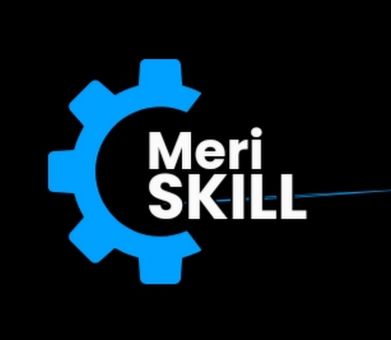



#   **DIABETES PREDICTION ANALYSIS**



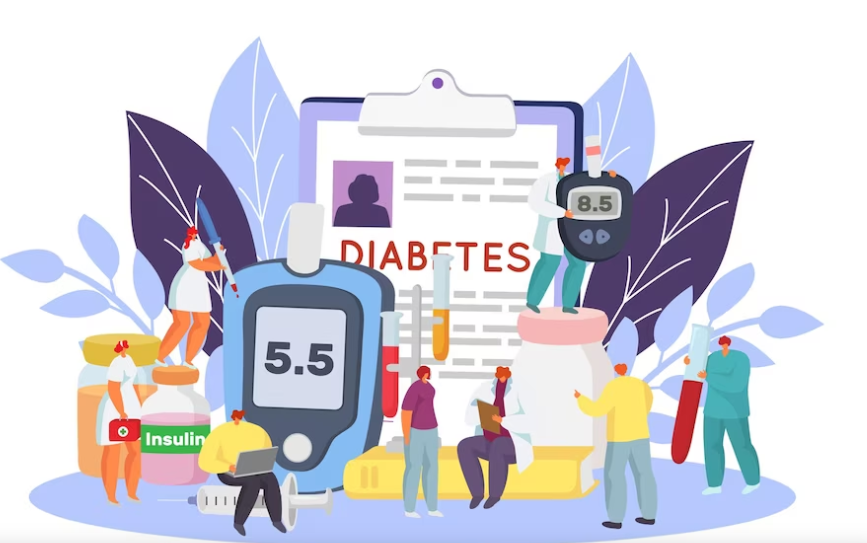

The aim of this project is to develop a diagnostic prediction model for diabetes based on specific medical measurements. The dataset used in this project originates from the National Institute of Diabetes and Digestive and Kidney Diseases and is designed to determine whether a patient has diabetes or not. It is important to note that the dataset's selection criteria are stringent: all patients included are females who are at least 21 years old and of Pima Indian heritage.

The dataset consists of several variables, with some being independent or medical predictor variables, and only one being the target dependent variable known as "Outcome." The independent variables likely include factors such as glucose levels, insulin levels, BMI (Body Mass Index), blood pressure, and others that are relevant to diabetes diagnosis. These variables serve as input features for the predictive model.

The primary objective of this project is to analysis various type of variables and showing whether a patient has diabetes or not in different charts.


In [ ]:
#import relevant libraries for numerical computation
import pandas as pd
import numpy as np
import scipy as spy
from pandas.plotting import scatter_matrix

#for visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import missingno as msno

#for missing values
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy import stats


In [ ]:
#mount drive on colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the dataset file
dt = pd.read_csv("/content/drive/My Drive/Assignment_data/Diabetes_analysis.csv")
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#total no of columns in the dataset
dt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Information of the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#describe the dataset
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
dt.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
#verifying the shape of the dataset
dt.shape

(768, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

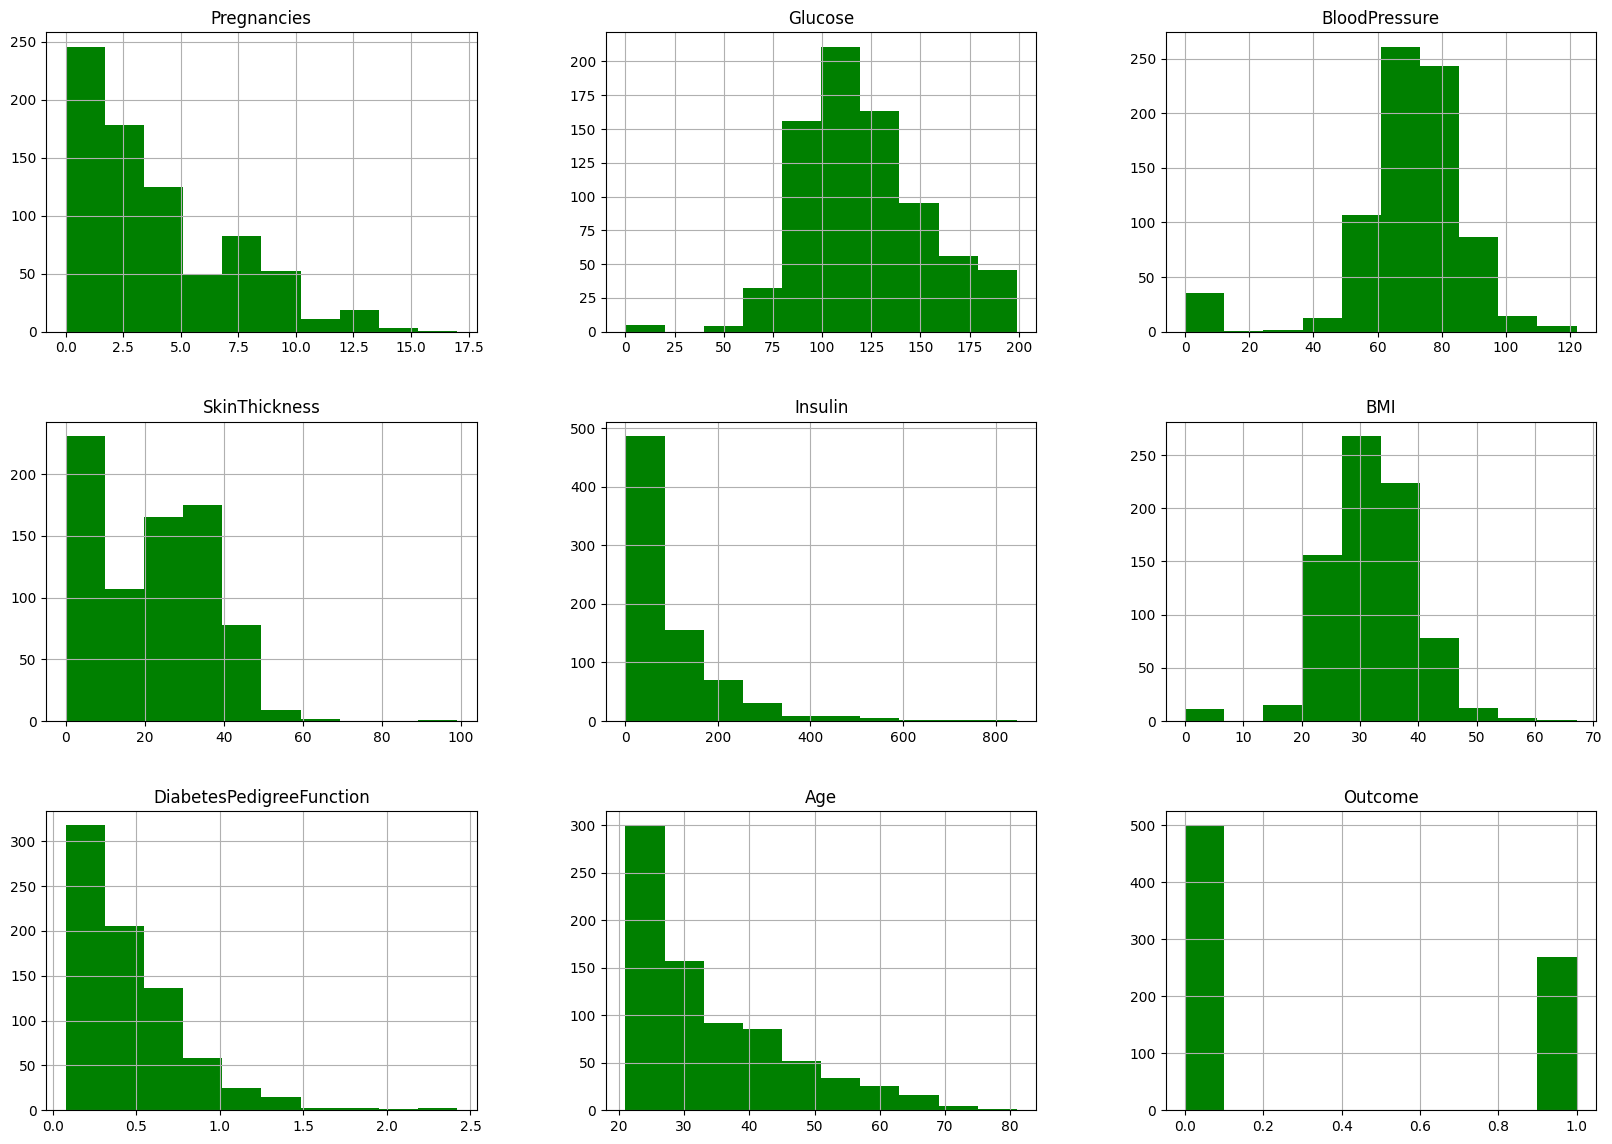

In [ ]:
#plotting the data distribution plots
dt.hist(figsize=(20,14), color = 'green')
plt.show

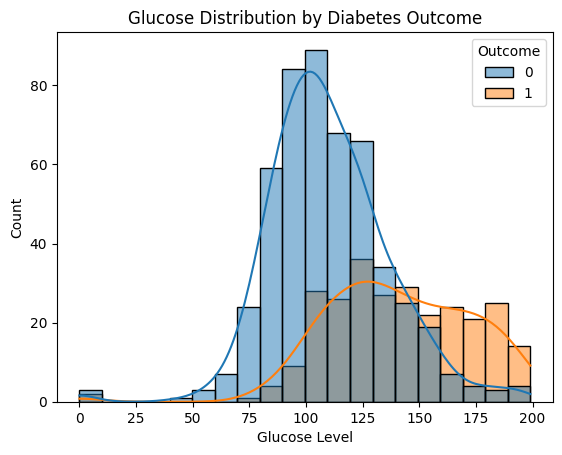

In [ ]:
# Visualization 1: Histogram of Glucose by Outcome
sns.histplot(dt, x="Glucose", hue="Outcome", bins=20, kde=True)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

Without diabetes have glucose levels that are closer to the range of 75 to 150 than to the range of normal.

Glucose levels in diabetics are typically between 100 and 200. This is a very strong indicator that each person's glucose level has a significant impact and relationship with their level of diabetes.

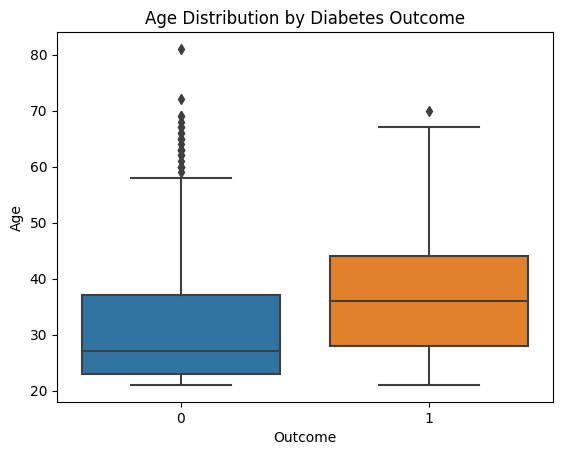

In [ ]:
# Visualization 2: Box Plot of Age by Outcome
sns.boxplot(dt, x="Outcome", y="Age",)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

The difference between the mean ages of individuals with diabetes and those without it—38 versus 30, respectively—strongly suggests that as people age, their risk of developing diabetes rises.

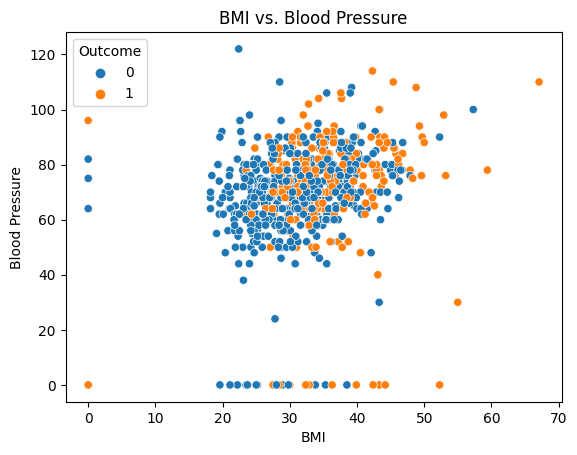

In [ ]:
# Visualization 3: Scatter Plot of BMI vs. Blood Pressure
sns.scatterplot(dt, x="BMI", y="BloodPressure", hue="Outcome")
plt.title("BMI vs. Blood Pressure")
plt.xlabel("BMI")
plt.ylabel("Blood Pressure")
plt.show()


Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. It is calculated by dividing a person's weight in kilograms by the square of their height in meters.

The BMI ranges are as follows:

Underweight: BMI < 18.5 Normal weight: BMI 18.5 to 24.9 Overweight: BMI 25 to 29.9 Obese: BMI 30 or greater It is observed that the BMI range for the Pima India Heritage is roughly between 25 - 42 with a mean value of 32.4. This suggest that most of individuals are Overweight or Obese accounting for a an high blood pressure since fat cells produce substances that can narrow the blood vessels, making it harder for blood to flow. This can increase the pressure of the blood against the walls of the blood vessels.

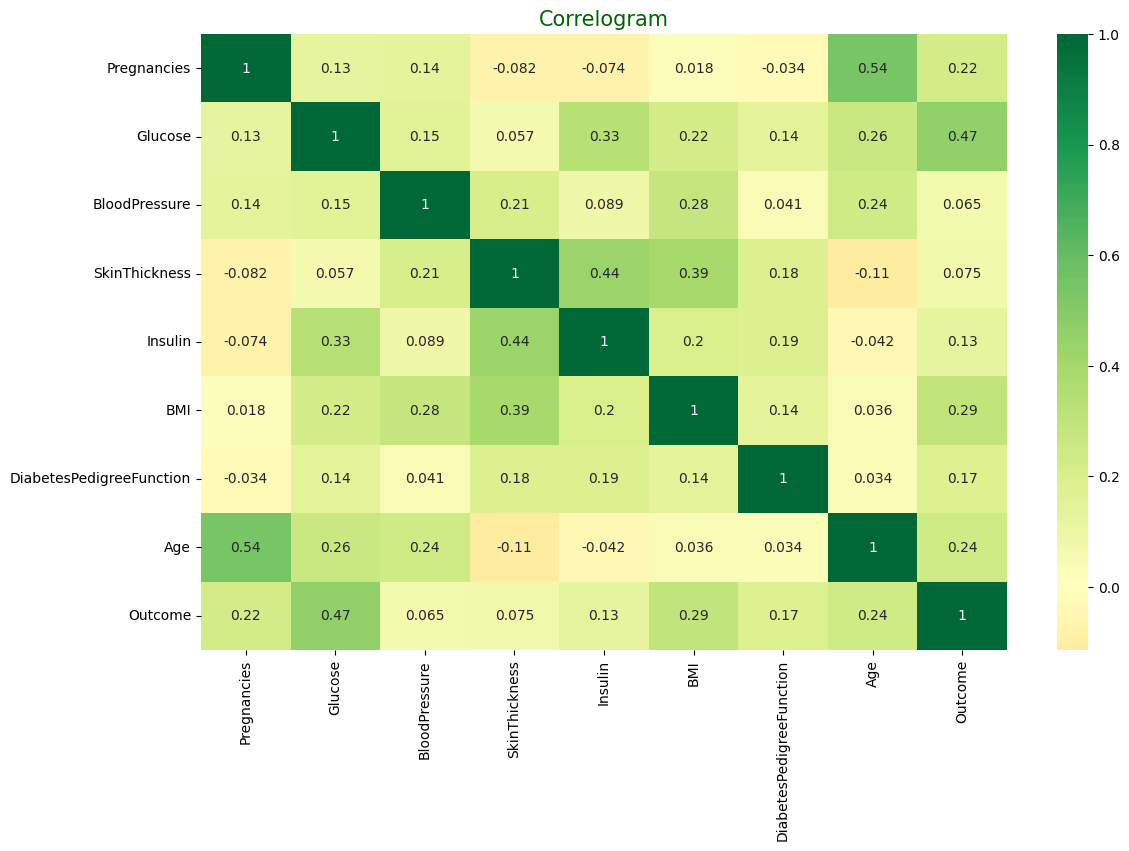

In [ ]:
# Visualization 4: Correlation Heatmap
corr = dt.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn',  annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Outcome is positively correlated with all columns.

No other columns are bigger than 0.5.


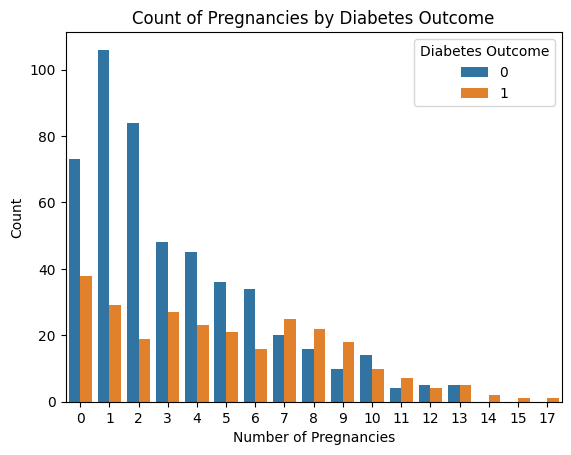

In [ ]:
sns.countplot(x="Pregnancies", hue="Outcome", data=dt)
plt.title("Count of Pregnancies by Diabetes Outcome")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Count")
plt.legend(title="Diabetes Outcome")
plt.show()


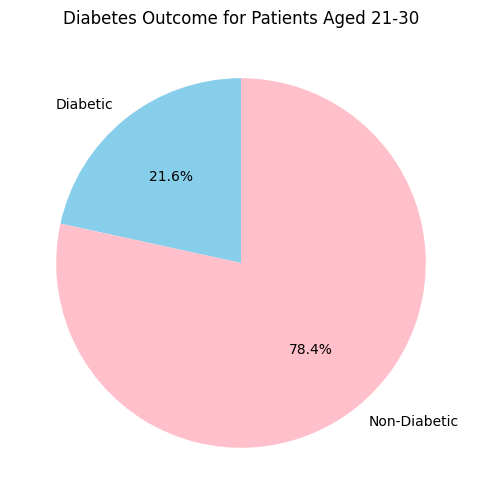

In [ ]:
# Filter the data to include only patients with age between 20 and 30
filtered_dt = dt[(dt['Age'] > 20) & (dt['Age'] <= 30)]

# Count the number of diabetic and non-diabetic patients
diabetic_count = filtered_dt['Outcome'].value_counts()[1]
non_diabetic_count = filtered_dt['Outcome'].value_counts()[0]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([diabetic_count, non_diabetic_count], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)
plt.title('Diabetes Outcome for Patients Aged 21-30')
plt.show()


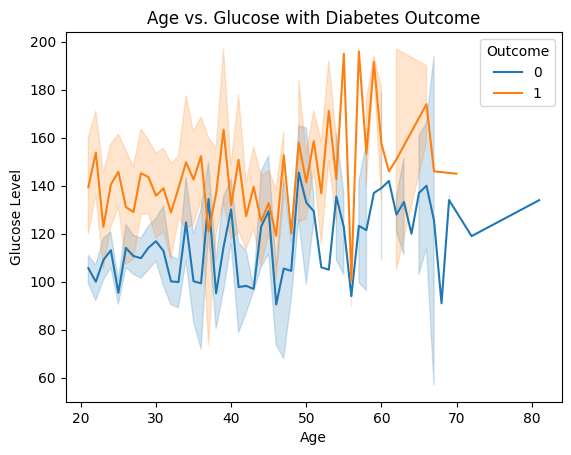

In [ ]:
# Visualization 7: Line Plot of Age vs. Glucose
sns.lineplot(dt, x="Age", y="Glucose", hue="Outcome")
plt.title("Age vs. Glucose with Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

We can see in this chart at the of 60 to 70, the glucose level becomes superlevel indication.